In [1]:
import pandas as pd
import numpy as np

In [2]:
left = pd.DataFrame({
    "id_l":[1,2,3,4,5],
    "Name_l":["Alex","Amy","Allen","Alice","Ayoung"],
    "subject_id":["sub1","sub2","sub4","sub6","sub5"]})

right=pd.DataFrame({
    "id_r":[1,2,3,4],
    "Name_r":["Billy","Brian","Bran","Bryce"],
    "subject_id":["sub2","sub4","sub3","sub6"]})

In [3]:
left.merge(right,how="left",on="subject_id")

,id_l,Name_l,subject_id,id_r,Name_r
0,1,Alex,sub1,NaN,NaN
1,2,Amy,sub2,1.0,Billy
2,3,Allen,sub4,2.0,Brian
3,4,Alice,sub6,4.0,Bryce
4,5,Ayoung,sub5,NaN,NaN


In [4]:
left_df = pd.DataFrame({
    "subject_id":[1,2,3,4,5],
    "first_name":["Alex","Amy","Allen","Alice","Ayoung"],
    "last_name":["Anderson","Ackerman","Ali","Aoni","Atiches"]
})

right_df = pd.DataFrame({
    "subject_id":[4,5,6,7,8],
    "first_name":["Billy","Brian","Bran","Bryce","Betty"],
    "last_name":["Bonder","Black","Balwner","Brice","Btisan"]
})

In [5]:
left_df.merge(right_df,on="subject_id",how="right")

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black
2,6,NaN,NaN,Bran,Balwner
3,7,NaN,NaN,Bryce,Brice
4,8,NaN,NaN,Betty,Btisan


In [6]:
left.merge(right,on="subject_id",how="outer")

,id_l,Name_l,subject_id,id_r,Name_r
0,1.0,Alex,sub1,NaN,NaN
1,2.0,Amy,sub2,1.0,Billy
2,3.0,Allen,sub4,2.0,Brian
3,4.0,Alice,sub6,4.0,Bryce
4,5.0,Ayoung,sub5,NaN,NaN
5,NaN,NaN,sub3,3.0,Bran


In [7]:
employee_l=pd.DataFrame({
    "employee":["Bob","Jake","Lisa","Sue"],
    "group":["Accounting","Engeneering","Engeneering","HR"]
})
employee_r=pd.DataFrame({
    "name":["Bob","Jake","Lisa","Sue"],
    "salary":[70000,80000,120000,90000]
})


In [8]:
employee_l.merge(employee_r,left_on="employee",right_on="name")

,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engeneering,Jake,80000
2,Lisa,Engeneering,Lisa,120000
3,Sue,HR,Sue,90000


In [9]:
employee_l.merge(employee_r,left_on="employee",right_on="name").drop("name",axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engeneering,80000
2,Lisa,Engeneering,120000
3,Sue,HR,90000


In [10]:
a2011=pd.read_csv("../data/americas_2011.csv",index_col=0)
a2012=pd.read_csv("../data/americas_2012.csv",index_col=0)

print(a2011)
print(a2012)

           2011
Country        
Canada   1700.0
Chile    2047.4
Mexico   2250.2
USA      1786.0
           2012
Country        
Canada   1713.0
Chile    2024.0
Mexico   2225.8
USA      1789.0


In [11]:
pd.merge(a2011,a2012,left_index=True,right_index=True)

,2011,2012
Country,,
Canada,1700.0,1713.0
Chile,2047.4,2024.0
Mexico,2250.2,2225.8
USA,1786.0,1789.0


In [12]:
a2011.join(a2012)

,2011,2012
Country,,
Canada,1700.0,1713.0
Chile,2047.4,2024.0
Mexico,2250.2,2225.8
USA,1786.0,1789.0


In [13]:
a2012_not_indexed= pd.read_csv("../data/americas_2012.csv")

In [14]:
pd.merge(a2011,a2012_not_indexed,left_index=True,right_on="Country")

,2011,Country,2012
0,1700.0,Canada,1713.0
1,2047.4,Chile,2024.0
2,2250.2,Mexico,2225.8
3,1786.0,USA,1789.0


In [15]:
left_df.merge(right_df,on="subject_id",how="right",suffixes=["_L","_R"])

,subject_id,first_name_L,last_name_L,first_name_R,last_name_R
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black
2,6,NaN,NaN,Bran,Balwner
3,7,NaN,NaN,Bryce,Brice
4,8,NaN,NaN,Betty,Btisan


In [16]:
abbrevs = pd.read_excel("../data/state-abbrevs_my.xlsx")
areas = pd.read_excel("../data/state-areas_my.xlsx")
pop = pd.read_excel("../data/state-pop_my.xlsx")


In [17]:
abbrevs

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,District of Columbia,DC
9,Florida,FL


In [18]:
pop

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0
...,...,...,...,...
2539,USA,total,2010,309326295.0
2540,USA,under18,2011,73902222.0
2541,USA,total,2011,311582564.0
2542,USA,under18,2012,73708179.0


In [19]:
# 2
merged= pd.merge(abbrevs,pop,left_on="abbreviation",right_on="state/region",how="outer").drop("abbreviation",axis=1)
merged

,state,state/region,ages,year,population
0,Alabama,AL,under18,2012,1117489.0
1,Alabama,AL,total,2012,4817528.0
2,Alabama,AL,under18,2010,1130966.0
3,Alabama,AL,total,2010,4785570.0
4,Alabama,AL,under18,2011,1125763.0
...,...,...,...,...,...
2539,NaN,USA,total,2010,309326295.0
2540,NaN,USA,under18,2011,73902222.0
2541,NaN,USA,total,2011,311582564.0
2542,NaN,USA,under18,2012,73708179.0


In [20]:
# 3
merged.isnull().any()

state            True
state/region    False
ages            False
year            False
population       True
dtype: bool

In [21]:
# 4
null_merged = merged[merged["state"].isnull()|merged["population"].isnull()]

In [22]:
null_merged.head()

,state,state/region,ages,year,population
2448,NaN,PR,under18,1990,NaN
2449,NaN,PR,total,1990,NaN
2450,NaN,PR,total,1991,NaN
2451,NaN,PR,under18,1991,NaN
2452,NaN,PR,total,1993,NaN


In [23]:
null_merged.tail()

,state,state/region,ages,year,population
2539,NaN,USA,total,2010,309326295.0
2540,NaN,USA,under18,2011,73902222.0
2541,NaN,USA,total,2011,311582564.0
2542,NaN,USA,under18,2012,73708179.0
2543,NaN,USA,total,2012,313873685.0


In [24]:
# 5
merged[merged["state"].isnull()].loc[:,"state/region"].unique()

array(['PR', 'USA'], dtype=object)

In [25]:
USA_Mask = merged.loc[:,"state/region"]=="USA"
USA_Mask

0       False
1       False
2       False
3       False
4       False
        ...  
2539     True
2540     True
2541     True
2542     True
2543     True
Name: state/region, Length: 2544, dtype: bool

In [26]:
PR_Mask = merged.loc[:,"state/region"]=="PR"
PR_Mask

0       False
1       False
2       False
3       False
4       False
        ...  
2539    False
2540    False
2541    False
2542    False
2543    False
Name: state/region, Length: 2544, dtype: bool

In [27]:
merged.loc[:,"state"][PR_Mask]= "Puerto Rico"

C:\Users\luche\AppData\Local\Temp\ipykernel_6384\17767632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged.loc[:,"state"][PR_Mask]= "Puerto Rico"


In [28]:
merged.loc[:,"state"][USA_Mask]= "United States of America"

C:\Users\luche\AppData\Local\Temp\ipykernel_6384\3580375279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged.loc[:,"state"][USA_Mask]= "United States of America"


In [29]:
merged

,state,state/region,ages,year,population
0,Alabama,AL,under18,2012,1117489.0
1,Alabama,AL,total,2012,4817528.0
2,Alabama,AL,under18,2010,1130966.0
3,Alabama,AL,total,2010,4785570.0
4,Alabama,AL,under18,2011,1125763.0
...,...,...,...,...,...
2539,United States of America,USA,total,2010,309326295.0
2540,United States of America,USA,under18,2011,73902222.0
2541,United States of America,USA,total,2011,311582564.0
2542,United States of America,USA,under18,2012,73708179.0


In [30]:
# 6
merged.isnull().any()

state           False
state/region    False
ages            False
year            False
population       True
dtype: bool

In [31]:
# 7
# areas
merged = pd.merge(merged,areas, on="state",how="outer")
merged


,state,state/region,ages,year,population,area (sq. mi)
0,Alabama,AL,under18,2012,1117489.0,52423.0
1,Alabama,AL,total,2012,4817528.0,52423.0
2,Alabama,AL,under18,2010,1130966.0,52423.0
3,Alabama,AL,total,2010,4785570.0,52423.0
4,Alabama,AL,under18,2011,1125763.0,52423.0
...,...,...,...,...,...,...
2539,United States of America,USA,total,2010,309326295.0,NaN
2540,United States of America,USA,under18,2011,73902222.0,NaN
2541,United States of America,USA,total,2011,311582564.0,NaN
2542,United States of America,USA,under18,2012,73708179.0,NaN


In [32]:
# 8
merged.isnull().any()

state            False
state/region     False
ages             False
year             False
population        True
area (sq. mi)     True
dtype: bool

---

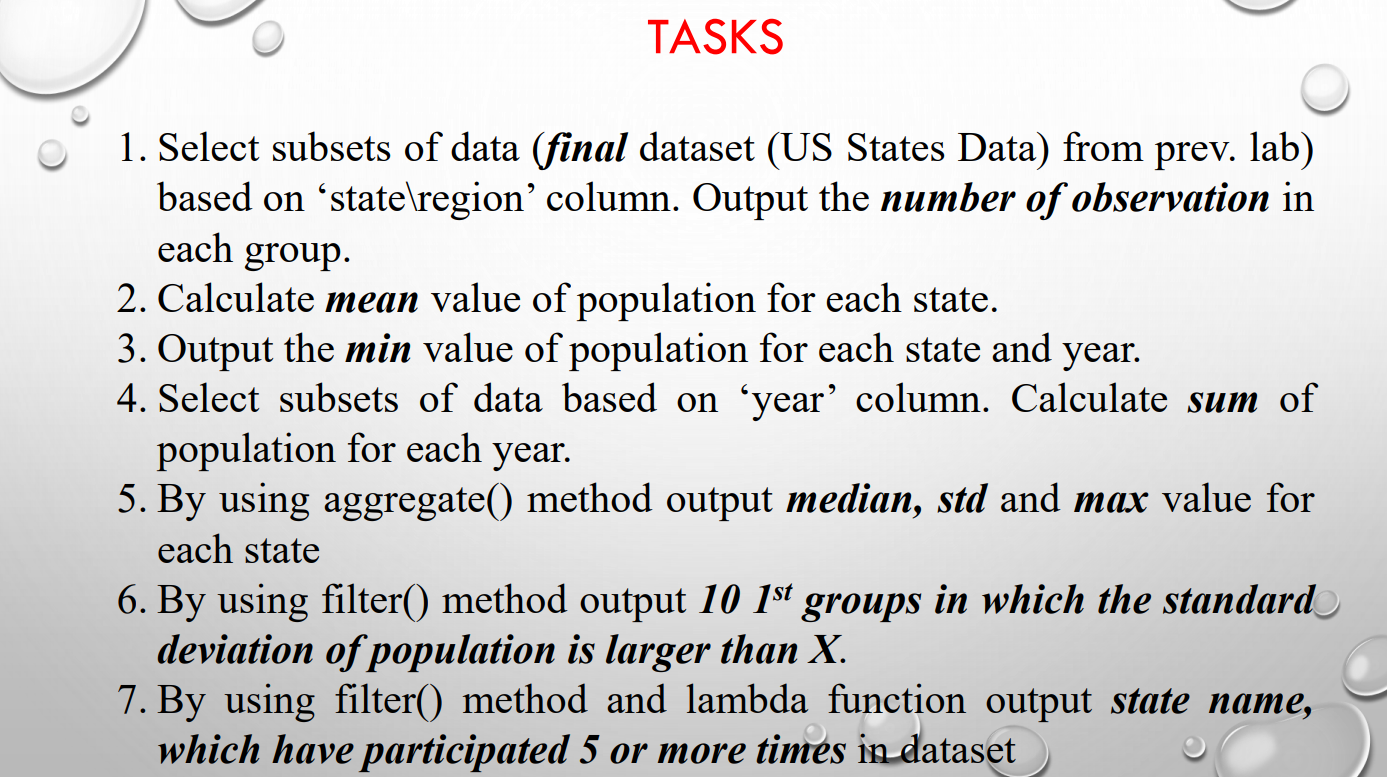

In [33]:
merged

,state,state/region,ages,year,population,area (sq. mi)
0,Alabama,AL,under18,2012,1117489.0,52423.0
1,Alabama,AL,total,2012,4817528.0,52423.0
2,Alabama,AL,under18,2010,1130966.0,52423.0
3,Alabama,AL,total,2010,4785570.0,52423.0
4,Alabama,AL,under18,2011,1125763.0,52423.0
...,...,...,...,...,...,...
2539,United States of America,USA,total,2010,309326295.0,NaN
2540,United States of America,USA,under18,2011,73902222.0,NaN
2541,United States of America,USA,total,2011,311582564.0,NaN
2542,United States of America,USA,under18,2012,73708179.0,NaN


In [42]:
# merged.groupby("state").count()

In [47]:
merged.groupby("state")["population"].mean()

state
Alabama                     2.797862e+06
Alaska                      4.164389e+05
Arizona                     3.337577e+06
Arkansas                    1.686640e+06
California                  2.170908e+07
Colorado                    2.727803e+06
Connecticut                 2.128442e+06
Delaware                    4.979201e+05
District of Columbia        3.496533e+05
Florida                     1.008313e+07
Georgia                     5.285421e+06
Hawaii                      7.781240e+05
Idaho                       8.576250e+05
Illinois                    7.757703e+06
Indiana                     3.838380e+06
Iowa                        1.831789e+06
Kansas                      1.703569e+06
Kentucky                    2.536397e+06
Louisiana                   2.811572e+06
Maine                       7.906852e+05
Maryland                    3.357502e+06
Massachusetts               3.891187e+06
Michigan                    6.157709e+06
Minnesota                   3.108525e+06
Mississipp

In [48]:
merged.groupby("state")["population"].min()

state
Alabama                      1050041.0
Alaska                        177502.0
Arizona                      1006040.0
Arkansas                      620933.0
California                   7980501.0
Colorado                      881640.0
Connecticut                   752666.0
Delaware                      165628.0
District of Columbia          101309.0
Florida                      2988807.0
Georgia                      1747363.0
Hawaii                        279983.0
Idaho                         313373.0
Illinois                     2940837.0
Indiana                      1437209.0
Iowa                          718488.0
Kansas                        662641.0
Kentucky                      945951.0
Louisiana                    1078779.0
Maine                         261276.0
Maryland                     1180426.0
Massachusetts                1353806.0
Michigan                     2245201.0
Minnesota                    1176680.0
Mississippi                   733660.0
Missouri           

In [49]:
merged.groupby("year")["population"].min()

year
1990    112632.0
1991    116825.0
1992    118636.0
1993    120471.0
1994    122170.0
1995    123620.0
1996    121210.0
1997    119531.0
1998    113839.0
1999    115003.0
2000    114503.0
2001    114625.0
2002    113822.0
2003    111403.0
2004    109756.0
2005    107187.0
2006    105651.0
2007    104126.0
2008    102257.0
2009    102098.0
2010    101309.0
2011    103906.0
2012    107642.0
2013    111474.0
Name: population, dtype: float64

In [50]:
merged.groupby("year")["population"].sum()

year
1990    627682652.0
1991    636587920.0
1992    646046816.0
1993    655027066.0
1994    663533524.0
1995    671503086.0
1996    679255606.0
1997    687135340.0
1998    694571044.0
1999    701972464.0
2000    713976868.0
2001    720176600.0
2002    726012052.0
2003    731294092.0
2004    737068863.0
2005    742921345.0
2006    749079009.0
2007    755257832.0
2008    761103707.0
2009    766472596.0
2010    771509855.0
2011    775525479.0
2012    779657013.0
2013    783858576.0
Name: population, dtype: float64

In [51]:
merged.groupby("state")["population"].aggregate([np.median,np.std,max])

,median,std,max
state,,,
Alabama,2592491.0,1.712509e+06,4833722.0
Alaska,372963.0,2.349527e+05,735132.0
Arizona,2656374.0,2.093351e+06,6626624.0
Arkansas,1534266.5,1.025828e+06,2959373.0
California,19689006.0,1.288952e+07,38332521.0
Colorado,2272775.0,1.702535e+06,5268367.0
Connecticut,2071541.0,1.328675e+06,3596080.0
Delaware,437890.0,3.134898e+05,925749.0
District of Columbia,344426.0,2.404787e+05,646449.0


In [85]:
X = 2000000
merged.groupby("state")["population"].filter(lambda x: x.std()>X)[:10]

C:\Users\luche\AppData\Local\Temp\ipykernel_6384\1880134869.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  merged.groupby("state")["population"].filter(lambda x: x.std()>X)[:10]


96     1617149.0
97     6551149.0
98     1616353.0
99     6468796.0
100    1628563.0
101    6408790.0
102    1616814.0
103    6626624.0
104    6343154.0
105    1627343.0
Name: population, dtype: float64

In [95]:
merged.groupby("state").filter(lambda x: x.count()["state/region"]>5)["state"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'Puerto Rico', 'United States of America'], dtype=object)